In [52]:


import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integral


def Simpson(begin, end, partitions):
    '''
    Approximates the area under the curve using series expansion
    '''
    f = lambda x: (x**4 * np.exp(x)) * (np.exp(x)-1)**-2
    
    dx = (end - begin)/partitions
    X = np.linspace(begin, end, partitions+1)
    Y = f(X)
    
    area = np.zeros([partitions+1],float)
    for i in range (partitions+1):
        if i==0 or i==partitions:
            coef = 1/3
        elif i%2 == 1:
            coef = 2/3
        else:
            coef = 4/3
        area[i] = coef * Y[i] * dx
        
    return sum(area)


def heat_capacity(start, end, plot=1):
    '''
    Program to calculate the heat capacity of a solid
    '''
    f = lambda x: (x**4 * np.exp(x)) * (np.exp(x)-1)**-2
    
    #constants
    V = 0.001                         #Volume in meters cubed
    rho = 2710                        #Density of aluminum in kg/m^3
    kb = 1.3807 * 10**-23             #Boltzman constant J/K
    theta = 428                       #Debye temperature in K
    t_min = 5                         #Minimum temp in K
    t_max = 500                       #Max temp in K
    dT = 5                            #Change in T
    parts = int((t_max - t_min)/dT)   #Subintervals
    eqn1 = 9*V*rho*kb                 #Part of equation for Cv
    Cv = []                           #array for y values (Cv)
    
    #calculate the heat capacity (Cv)
    for T in range(t_min, t_max+dT, dT):
        upper = theta / T                      #Upper bound in integral
        eqn2 = (T/theta)**3                    #Part of equation for Cv
        eqn3 = Simpson(10**-15, upper, 100)    #Integral part of equation for Cv
        Cv.append(eqn1*eqn2*eqn3)              #Create array values for Cv
    
    #now make plot
    T = np.linspace(t_min, t_max, parts+1)     #array for x values (temperature)   
    plt.xlim([start,end])
    plt.ylim([min(Cv),max(Cv)])
    plt.title('Heat Capacity of a Solid from 5K - 500K')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Heat Capacity (Cv)')
    plt.plot(T, Cv) 
    plt.show()


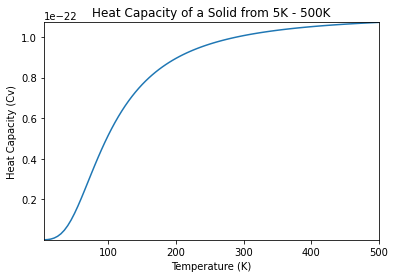

In [53]:
heat_capacity(5,500)